In [1]:
from torch import nn
import torch
import itertools
import numpy as np
import random
import gym
import os

In [2]:
from ipynb.fs.full.tSNE import *

In [3]:
GAME = 'MsPacman-ram-v0'
SAVED_MODEL_PATH = 'saved_models/pac-10.00-step-1680000.00-reward-577.60' 
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
class Network(nn.Module):
    def __init__(self, env):
        super().__init__()
        
        
        in_features = int(np.prod(env.observation_space.shape))
        
        self.net = nn.Sequential(
            nn.Linear(in_features, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, env.action_space.n))
        self.net.apply(self._init_weights)
        
    def _init_weights(self, layer):
        classname = layer.__class__.__name__
        if classname == 'Linear':
            nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')
    def forward(self, x):
        return self.net(x)
    
    def act(self, obs):
        obs_t = torch.as_tensor(obs, dtype=torch.float32).to(DEVICE)
        q_valules = self(obs_t.unsqueeze(0))
        
        max_q_index = torch.argmax(q_valules, dim=1)[0]
        action = max_q_index.detach().item()
                
        return action
    
    def save(self, path):
        torch.save(self.state_dict(), path)

In [5]:
def load_model():
    env = gym.make(GAME)
    network = Network(env).to(DEVICE)
    network.load_state_dict(torch.load(SAVED_MODEL_PATH, map_location=DEVICE))
    return network, env

A.L.E: Arcade Learning Environment (version 0.7.4+069f8bd)
[Powered by Stella]
/opt/homebrew/Caskroom/miniforge/base/envs/school/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/school/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


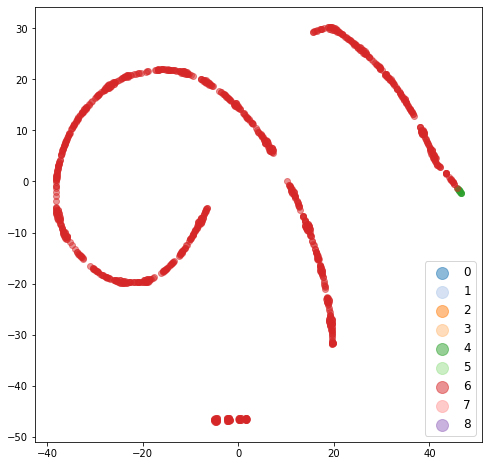

In [6]:
network, env = load_model()
run(network, env, DEVICE)